In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
import seaborn as sb
from matplotlib import font_manager as fm

In [3]:
origin=load_data('traffic_acc')
origin.head()

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


In [4]:
df=origin.drop('월',axis=1).groupby('년도').sum()
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [5]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=10
plt.rcParams['axes.unicode_minus']=False

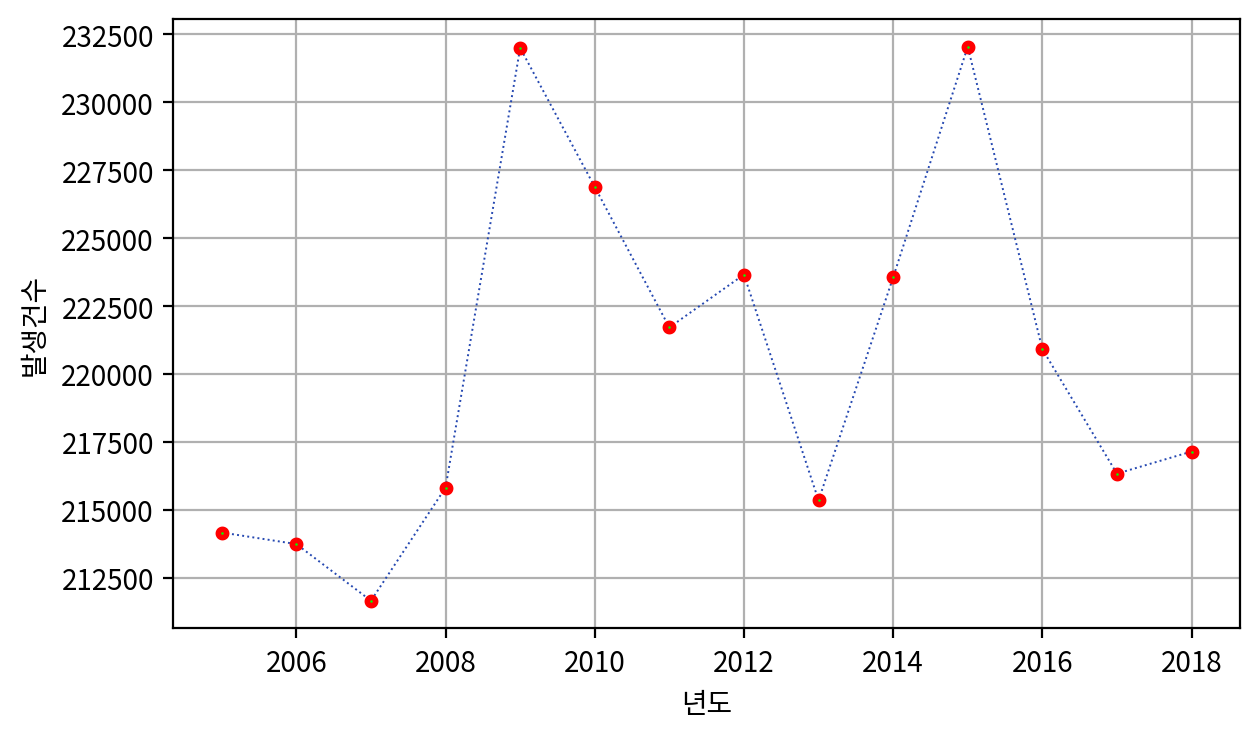

In [7]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.lineplot(data=df, x=df.index, y='발생건수',
            c='#2548b1',linestyle=':',linewidth=0.7,
            marker='o',markersize=2,markerfacecolor='#00ff00',
            markeredgecolor='#ff0000',markeredgewidth=3)

# 3. 그래프 꾸미기
ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

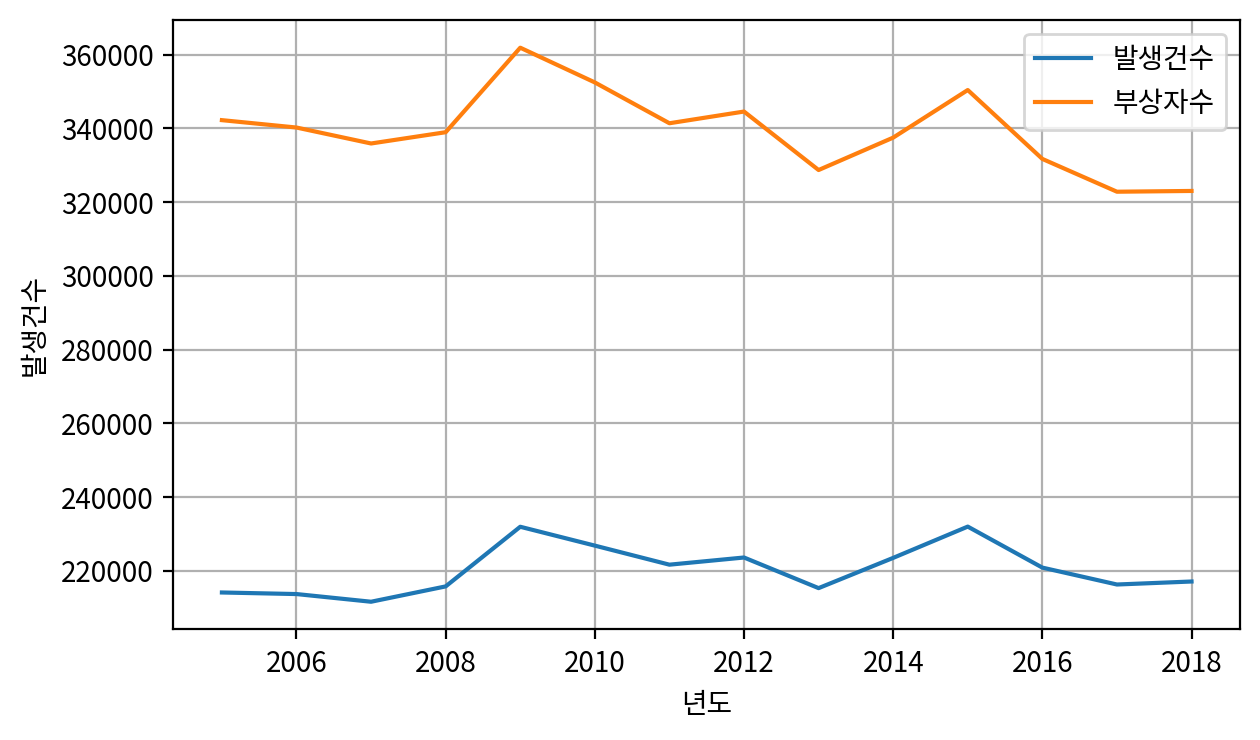

In [8]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.lineplot(data=df, x=df.index, y='발생건수', label='발생건수')
sb.lineplot(data=df, x=df.index, y='부상자수', label='부상자수')

# 3. 그래프 꾸미기
ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [9]:
df1=df.reset_index()
df1

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


In [10]:
df2=df1.melt(id_vars='년도', value_vars=['발생건수','사망자수','부상자수'], var_name='구분')
df2

,년도,구분,value
0,2005,발생건수,214171
1,2006,발생건수,213745
2,2007,발생건수,211662
3,2008,발생건수,215822
4,2009,발생건수,231990
5,2010,발생건수,226878
6,2011,발생건수,221711
7,2012,발생건수,223656
8,2013,발생건수,215354
9,2014,발생건수,223552


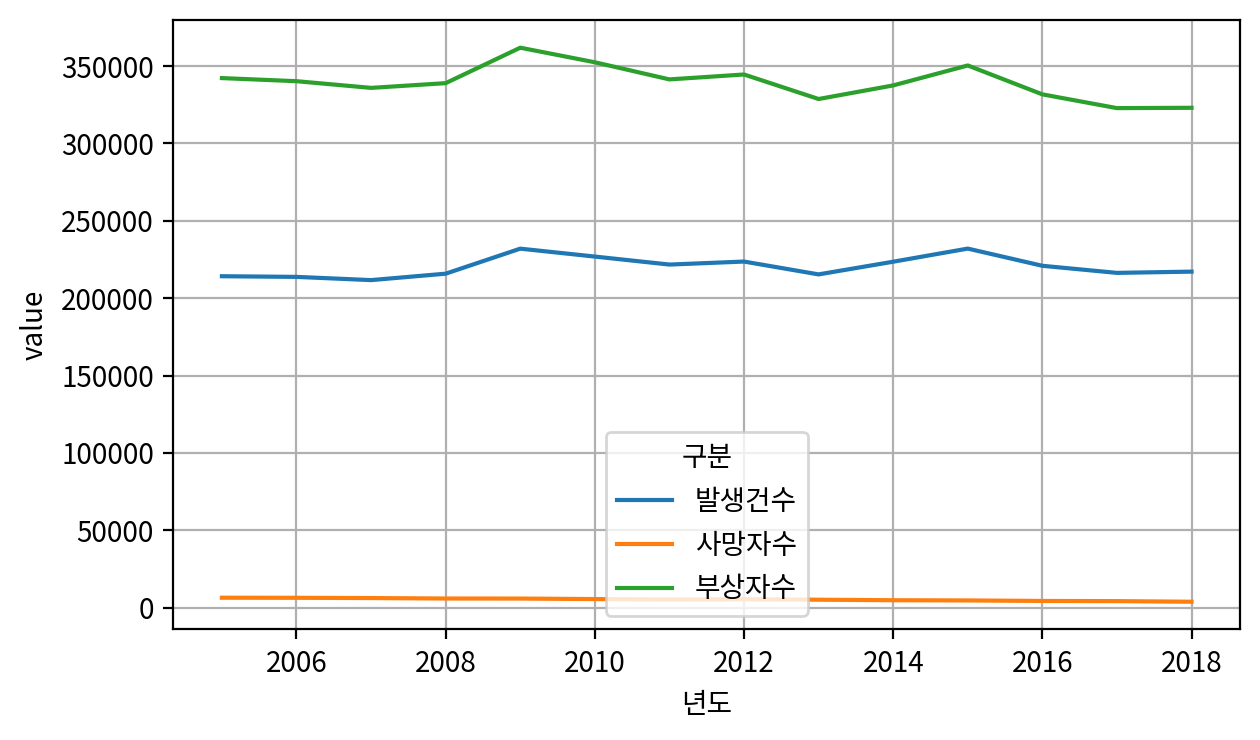

In [11]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.lineplot(data=df2, x='년도', y='value', hue='구분')

# 3. 그래프 꾸미기
ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()